### Import packages

In [1]:
# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

### Define all Variables

In [4]:
# Cylindrical storage tank properties
Q_roof = 0 # Roof heat ingress / W
T_air = 293.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.1 # W/m2/K
U_V = 0.1 # W/m2/K

# Specify wall heat partitioning fraction
eta_w= 0.9

# Specify tank operating pressure
P = 101325 # Pa

# Generate aspect ratio range
a = np.linspace(0.1, 1.5, 100)

### Variables of interest

# Vertically orientated cylindrical tank volume
V_tank = 165000 #m^3 | values of 80, 60000 and 165000

# Initial liquid filling / Dimensionless
LF = 0.80 # values of 0.95, 0.80 and 0.30

# Specify heat transfer rate at the bottom
# This will represent the heat conduction from the piping system
# Q_b = 60000 # W, 0 for V 80, 1000 for V 60000 and 60000 for V 165000

q_b = 13.09

# Initialize cryogen
Compound = "hydrogen" # hydrogen, methane, ammonia, nitrogen

C_cryo = Cryogen(name = Compound)
C_cryo.set_coolprops(P)

### Generate data

In [5]:
#Boil-off ratio list for plotting
BOR_plot = []

# Generate tanks in Aspect Ratio range
for Aspect_R in a:
    # Calcular diametro interno
    d_i = ((4 * V_tank)/(np.pi * Aspect_R))**(1/3) # internal diameter / m
    d_o = d_i * 1.02 # external diameter / m
    # Initialize tank
    mid_tank = Tank(d_i, d_o, V_tank, LF)

    Q_b=q_b*mid_tank.A_T
    
    mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b_fixed = None, Q_roof = 0, eta_w = eta_w)

    mid_tank.U_roof = U_V
    
    # Set cryogen
    mid_tank.cryogen = C_cryo
    
    # Calculate BOR
    BOR = (mid_tank.b_l_dot * 24 * 3600) / (mid_tank.V * mid_tank.LF * mid_tank.cryogen.rho_L)
    
    # Save BOR value
    BOR_plot.append(BOR*100)
    #rint("BOR = %.3f %% | B_l = %.3f " % (BOR * 100, mid_tank.b_l_dot))
    #print(f"Aspect Ratio:{Aspect_R:.3f}, Altura: {mid_tank.l:.3f} , Diametro interno:{mid_tank.d_i:.3f}, Volumen:{mid_tank.V} \n")


### Show and save data plot

FileNotFoundError: [Errno 2] No such file or directory: 'hydrogen/V_165000_LF_80.0_C_hydrogen.png'

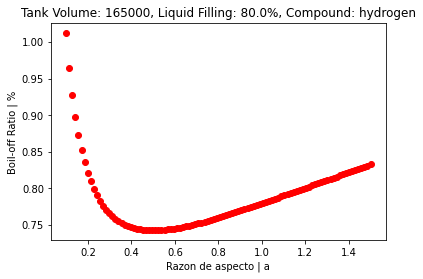

In [6]:
# Create a plot
plt.plot(a, BOR_plot,"ro")

# Add labels and title
plt.xlabel('Razon de aspecto | a')
plt.ylabel('Boil-off Ratio | %')
plt.title(f'Tank Volume: {V_tank}, Liquid Filling: {LF*100}%, Compound: {Compound}')

# Display the plot

plt.savefig(f'{Compound}/V_{V_tank}_LF_{LF*100}_C_{Compound}.png')
plt.show()

### Optimization

In [ ]:
from scipy.optimize import Bounds, minimize

# Minimum and maximum practical ranges
# of the aspect ratio
bounds = Bounds([0.1], [10])

# Define objective function
def BOR_function(AR):
    # Update aspect ratio
    # Calculate internal diameter
    d_i = ((4 * V_tank)/(np.pi * AR))**(1/3) # internal diameter / m
    d_o = d_i + 0.4 # external diameter / m
    
    # Initialize tank
    mid_tank = Tank(d_i, d_o, V_tank, LF)
    mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

    mid_tank.U_roof = U_V
    
    # Set cryogen
    mid_tank.cryogen = C_cryo
    
    # Calculate BOR
    BOR = (mid_tank.b_l_dot * 24 * 3600) / (mid_tank.V * mid_tank.LF * mid_tank.cryogen.rho_L)
    
    print("a = %.3f, BOR=%.3f" % (AR, BOR*100))
    return BOR  

# Initial liquid filling to optimise

x0 = 1 
res = minimize(BOR_function, x0, method='trust-constr', options={'verbose': 1}, bounds=bounds)

In [ ]:
res